
Accuracy: 76.73%
Precision: 0.79
Recall: 0.61


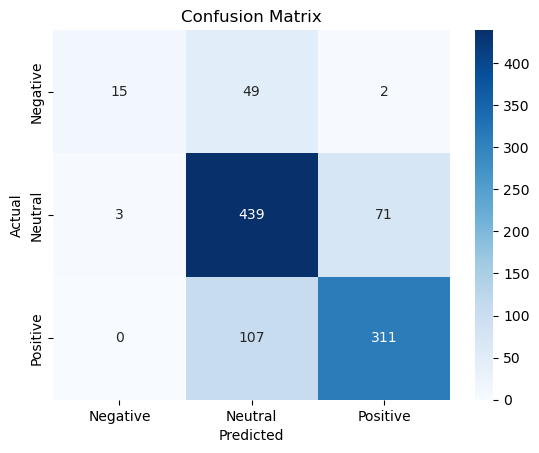

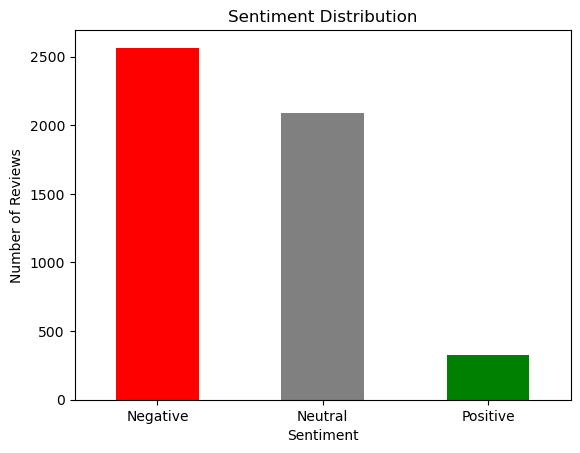


Top Recommended Products based on Positive Reviews:
Care & More Soft Cream With Glycerin - Strawbery - 75 ML
NIVEA Antiperspirant Spray for Women, 48h Protection, Black & White Invisible Silky Smooth Shaving, 150ml
Skyline 32-22A - 32-inch HD LED TV - Limited
Women Beach Sandals
L'oreal Elvive Hyaluron Moisture 72H Moisture Filling Shampoo - 600ml
Axe Body Spray for Men Leather & Cookies 150ML
Feba Dish Cleaner For Automatic Dishwashing Salt - 1 kg
NIVEA MEN Antiperspirant Spray for Men, 48h Protection, Silver Protect Antibacterial, 150ml
Maybelline Maybelline New York Lash Sensational Sky High Mascara
Oxi Powder Det lavender - 1 Kg
L'Oreal Paris Hyaluron Expert 1.5% Hyaluronic Acid Serum - 30ml
Johnson's Face & Body Intense Cream - Dry to Very Dry Skin  200ml
Vaseline Jelly Original - 50ml
L'Oreal Paris Hyaluron Expert Repluming Moisturizing day Cream - 50ml
Maybelline New York Maybelline Lifter Lip Gloss, 003 Moon
L'Oreal Paris Elvive Extraordinary Oil Mask very dry hair- 300ml
Fog

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob


df = pd.read_csv('sentiment.csv', encoding='ISO-8859-1')


df['Review'] = df['Review'].astype(str)


def get_sentiment(review):
    if not isinstance(review, str) or review.strip() == '':
        return 0 
    analysis = TextBlob(review)
    if analysis.sentiment.polarity > 0.2:
        return 1 # Positive
    elif analysis.sentiment.polarity < -0.2:
        return -1 # Negative
    else:
        return 0 # Neutral


df['Sentiment'] = df['Review'].apply(get_sentiment)



df = df.dropna()


X = df['Review']
y = df['Sentiment']


from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(X).toarray()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)

print(f"\nAccuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")



conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


sentiment_counts = df['Sentiment'].value_counts()
ax = sentiment_counts.plot(kind='bar', color=['red', 'gray', 'green'])
#sentiment_counts.plot(kind='bar', color=['red', 'gray', 'green'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'], rotation=0, ha='center')
#plt.xticks(ticks=[-1, 0, 1], labels=['Negative', 'Neutral', 'Positive'], rotation=0, ha='center')
plt.show()


positive_reviews = df[df['Sentiment'] == 1]['ProductName']
neutral_reviews = df[df['Sentiment'] == 0]['ProductName']

print("\nTop Recommended Products based on Positive Reviews:")
for product in positive_reviews:
    print(product)

print("\nNeutral Reviewed Products:")
for product in neutral_reviews:
    print(product)
